# ***Pre-Process Example***

This notebook shows example of the preprocess.

### ***Import packages***

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser, getionimage
from spectrum_utils import SpectrumUtils

### ***Define variables***

Define constant variables:

In [8]:
# define the lowest mz value in spectrum
MZ_START = 49

# define the largest mz value in spectrum
MZ_END = 1201

# define the spectrum mass resultion
MASS_RESOLUTION = 0.025

# create spectrum bins using spectrum lowest and largest
# mz value and spectrum mass resultion
BINS = np.around(np.arange(MZ_START, MZ_END, MASS_RESOLUTION/2), 5)

Define non constant but global variables:

In [9]:
# path to imzML-DESI file
imzml_file = 'imzml-DESI/HG 11-11-12-s.imzML'

# path to preprocessed imzML-DESI file
preprocessed_imzml_file = 'preprocessed-imzml-DESI/HG 11-11-12-s.imzML'

### ***Show changes in single spectrum:***

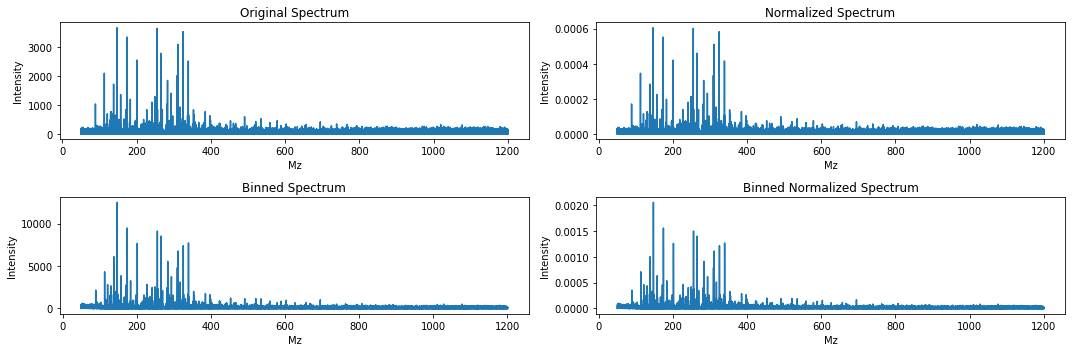

In [10]:
# parse imzML file
p = ImzMLParser(imzml_file)

# get index 0 spectrum
original_mzs, original_intensities = p.getspectrum(0)

# normalize spectrum
normalized_mzs, normalize_intensities = SpectrumUtils().normalize_spectrum(
    (original_mzs, original_intensities))

#  bin spectrum
binned_mzs, binned_intensities = SpectrumUtils().bining_spectrum(
    (original_mzs, original_intensities), BINS)

# normalize and bin spectrum
binned_normalized_mzs, binned_normalized_intensities = (
    SpectrumUtils().bining_spectrum(
        SpectrumUtils().normalize_spectrum(
            (original_mzs, original_intensities)), BINS))

# create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# left top subplot
ax[0, 0].plot(original_mzs, original_intensities)
ax[0, 0].set_xlabel('Mz')
ax[0, 0].set_ylabel('Intensity')
ax[0, 0].set_title('Original Spectrum')

# right top subplot
ax[0, 1].plot(normalized_mzs, normalize_intensities)
ax[0, 1].set_xlabel('Mz')
ax[0, 1].set_ylabel('Intensity')
ax[0, 1].set_title('Normalized Spectrum')

# left bottom subplot
ax[1, 0].plot(binned_mzs, binned_intensities)
ax[1, 0].set_xlabel('Mz')
ax[1, 0].set_ylabel('Intensity')
ax[1, 0].set_title('Binned Spectrum')

# right bottom subplot
ax[1, 1].plot(binned_normalized_mzs, binned_normalized_intensities)
ax[1, 1].set_xlabel('Mz')
ax[1, 1].set_ylabel('Intensity')
ax[1, 1].set_title('Binned Normalized Spectrum')

# show plots
plt.tight_layout()
plt.show()

### ***Compare sample before and after preprocessing:***

NOTE - we need to run the preprocess before running this code because it 
need the preprocessed files.

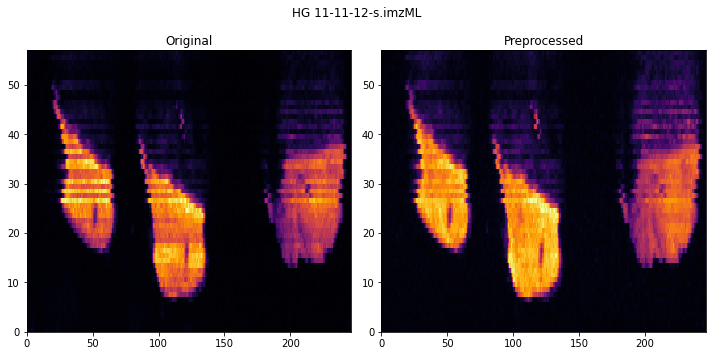

In [15]:
# open non preprocessed imzML file
p1 = ImzMLParser(imzml_file)

# open preprocessed imzML file
p2 = ImzMLParser(preprocessed_imzml_file)

# get image of the peaks for non preprocessed imzML file
img_794_1 = getionimage(p1, 794.5, tol=0.1)
img_834_1 = getionimage(p1, 834.5, tol=0.1)
img_888_1 = getionimage(p1, 888.6, tol=0.1)

# get image of the peaks for preprocessed imzML file
img_794_2 = getionimage(p2, 794.5, tol=0.1)
img_834_2 = getionimage(p2, 834.5, tol=0.1)
img_888_2 = getionimage(p2, 888.6, tol=0.1)

# create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# left top subplot
ax[0].pcolormesh(img_794_1 + img_834_1 + img_888_1, cmap='inferno')
ax[0].set_title('Original')

# right top subplot
ax[1].pcolormesh(img_794_2 + img_834_2 + img_888_2, cmap='inferno')
ax[1].set_title('Preprocessed')

# show plots
fig.suptitle(f"{os.path.split(imzml_file)[1]}")
plt.tight_layout()
plt.show()